In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
delivery_time=pd.read_csv('delivery_time.csv')

In [11]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
delivery_time.shape

(21, 2)

In [12]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [15]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [16]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\konga_21xqbnk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

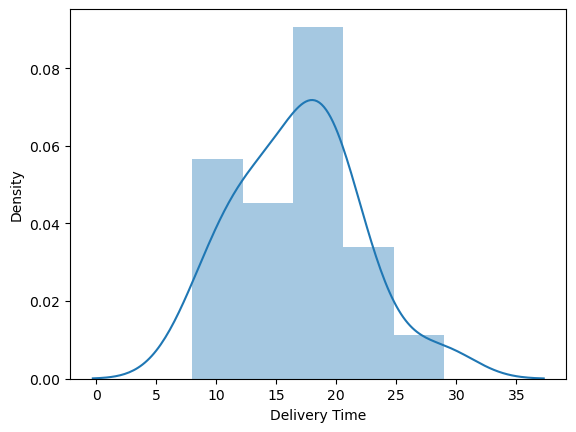

In [17]:
sns.distplot(delivery_time['Delivery Time'])

C:\Users\konga_21xqbnk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

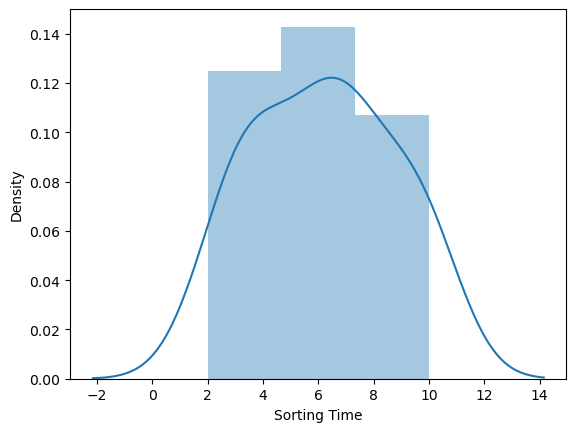

In [18]:
sns.distplot(delivery_time['Sorting Time'])

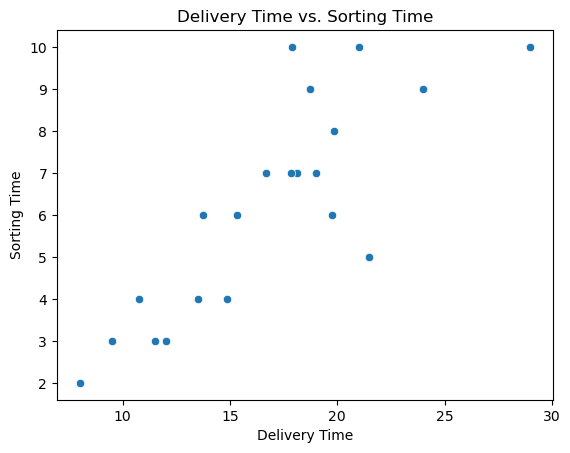

In [19]:
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=delivery_time)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Delivery Time vs. Sorting Time')
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

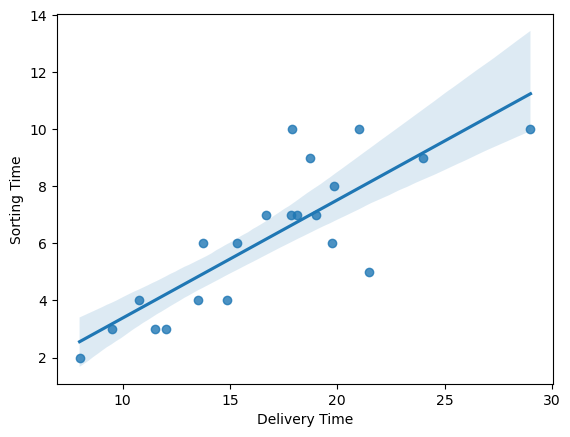

In [20]:
sns.regplot(x='Delivery Time', y='Sorting Time', data=delivery_time)

<AxesSubplot:>

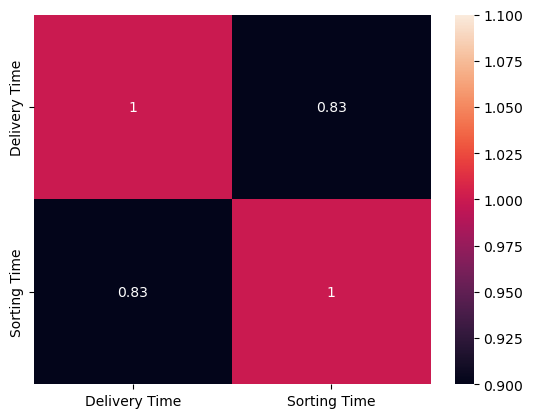

In [22]:
sns.heatmap(data=delivery_time.corr(), vmin=1, vmax=1, annot=True)

<AxesSubplot:>

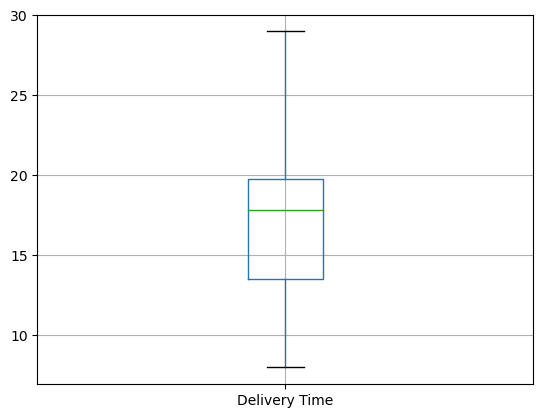

In [25]:
delivery_time.boxplot(column=['Delivery Time'])

<AxesSubplot:>

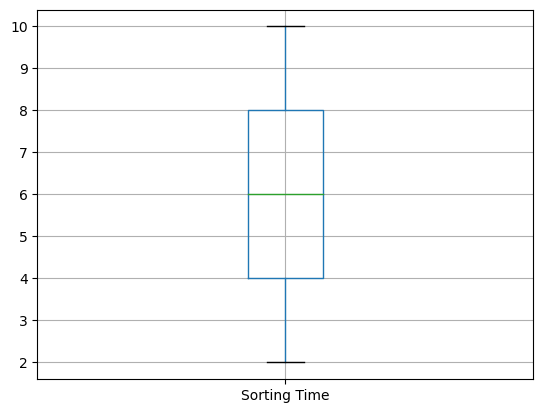

In [26]:
delivery_time.boxplot(column=['Sorting Time'])

In [27]:
delivery_time[delivery_time.duplicated()].shape

(0, 2)

In [28]:
delivery_time[delivery_time.duplicated()]

,Delivery Time,Sorting Time


In [45]:
x=delivery_time['Delivery Time']
y=delivery_time['Sorting Time']
x=sm.add_constant(x)
x.head()

,const,Delivery Time
0,1.0,21.00
1,1.0,13.50
2,1.0,19.75
3,1.0,24.00
4,1.0,29.00


In [51]:

import statsmodels.api as sm

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        17:39:31   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""